<a href="https://colab.research.google.com/github/achstu/biosignals/blob/main/EOG/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analiza EOG ##

#### Pobieranie sygnałów ####

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.signal as ss

In [ ]:
url = "https://drive.google.com/drive/folders/1bHsEBgUbopbHN5EG_Svv7vCIxrrbLToN?usp=sharing"
gdown.download_folder(url)

Retrieving folder contents


Processing file 1CY9cBVoPJW8eG2FNAZMcmg9DRIyGdaZL baja.obci.raw
Processing file 12rTMrQno3tOTtItynPQ0y--q5R8yepQD baja.obci.tag
Processing file 1NG40KzKWppbd4QAb_nkhr__X12eIaIxC baja.obci.xml
Processing file 1-r2xMrioF2e1NvQCkeIfz0rokKtZu-_s facio.obci.raw
Processing file 1byouHQwyumm_z6vjnHGlEPfajRyk8lHL facio.obci.tag
Processing file 1okOkMVRKY4xk72Iq_VyOdklLqq3fPz64 facio.obci.xml
Processing file 1zpqqkMWpg_uqDM2lfGNhUP6UPrp9juuk goradol.obci.raw
Processing file 1nJOs6COpUzhj4CvqD-RQnCUek6ATrYNc goradol.obci.tag
Processing file 1fOt5jCKJKr7gre7dlblyGPO0JnYmEBIp goradol.obci.xml
Processing file 18GVEvQhtUS47CovOol0b0JuhCeoJbat7 jadro.obci.raw
Processing file 1PKx-2KbkW_NeA7jtRdibR15gSnsy4c9P jadro.obci.tag
Processing file 19IipCC0CU3jAScXF2oljDxSRazTwBfMa jadro.obci.xml
Processing file 1doT18tdvOeEBduibP92WXP9xwZQ4RTzG lewoprawo.obci.raw
Processing file 1AiXPuFSQ4fA1N816kYdC98MKyWoj_DXO lewoprawo.obci.tag
Processing file 1d5sIBNfLzC6QfeLppwTY_ckFgpKbADC0 lewoprawo.obci.xml
Processing

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1CY9cBVoPJW8eG2FNAZMcmg9DRIyGdaZL
To: /content/recording/baja.obci.raw
100%|██████████| 233k/233k [00:00<00:00, 85.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=12rTMrQno3tOTtItynPQ0y--q5R8yepQD
To: /content/recording/baja.obci.tag
100%|██████████| 161/161 [00:00<00:00, 516kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1NG40KzKWppbd4QAb_nkhr__X12eIaIxC
From (redirected): https://drive.google.com/uc?id=1NG40KzKWppbd4QAb_nkhr__X12eIaIxC&confirm=t&uuid=1c6c708e-5b2e-4baa-90f3-e7de3cba8832
To: /content/recording/baja.obci.xml
100%|██████████| 1.42k/1.42k [00:00<00:00, 3.85MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-r2xMrioF2e1NvQCkeIfz0rokKtZu-_s
To: /content/recording/facio.obci.raw
100%|██████████| 90.0k/90.0k [00:00<00:00, 66.0MB/s]
Downloading...
From: https://drive.google.com/uc?i

['/content/recording/baja.obci.raw',
 '/content/recording/baja.obci.tag',
 '/content/recording/baja.obci.xml',
 '/content/recording/facio.obci.raw',
 '/content/recording/facio.obci.tag',
 '/content/recording/facio.obci.xml',
 '/content/recording/goradol.obci.raw',
 '/content/recording/goradol.obci.tag',
 '/content/recording/goradol.obci.xml',
 '/content/recording/jadro.obci.raw',
 '/content/recording/jadro.obci.tag',
 '/content/recording/jadro.obci.xml',
 '/content/recording/lewoprawo.obci.raw',
 '/content/recording/lewoprawo.obci.tag',
 '/content/recording/lewoprawo.obci.xml',
 '/content/recording/mrugi.obci.raw',
 '/content/recording/mrugi.obci.tag',
 '/content/recording/mrugi.obci.xml',
 '/content/recording/skiery.obci.raw',
 '/content/recording/skiery.obci.tag',
 '/content/recording/skiery.obci.xml',
 '/content/recording/spocz.obci.raw',
 '/content/recording/spocz.obci.tag',
 '/content/recording/spocz.obci.xml',
 '/content/recording/wegry.obci.raw',
 '/content/recording/wegry.obci.

In [ ]:
!ls recording/ | awk -F. '{print $1}' | uniq

baja
facio
goradol
jadro
lewoprawo
mrugi
skiery
spocz
wegry


In [ ]:
!cat recording/spocz.obci.xml

<?xml version="1.0" encoding="utf-8"?>
<rs:rawSignal xmlns:rs="http://signalml.org/rawsignal">
	<rs:exportFileName>name</rs:exportFileName>
	<rs:sourceFileName>/home/syg_bio_1/Pulpit/EOG/spocz.obci.raw</rs:sourceFileName>
	<rs:sourceFileFormat>
		<rs:rawSignalInfo></rs:rawSignalInfo>
	</rs:sourceFileFormat>
	<rs:samplingFrequency>128.0</rs:samplingFrequency>
	<rs:channelCount>4</rs:channelCount>
	<rs:sampleCount>7708</rs:sampleCount>
	<rs:calibration>1.0</rs:calibration>
	<rs:sampleType>FLOAT</rs:sampleType>
	<rs:byteOrder>LITTLE_ENDIAN</rs:byteOrder>
	<rs:pageSize>20.0</rs:pageSize>
	<rs:blocksPerPage>5</rs:blocksPerPage>
	<rs:channelLabels>
		<rs:label>dol</rs:label>
		<rs:label>gora</rs:label>
		<rs:label>lewo</rs:label>
		<rs:label>ExG4</rs:label>
	</rs:channelLabels>
	<rs:calibrationGain>
		<rs:calibrationParam>0.07150000333786011</rs:calibrationParam>
		<rs:calibrationParam>0.07150000333786011</rs:calibrationParam>
		<rs:calibrationParam>0.07150000333786011</rs:calibrationParam>


In [ ]:
Fs = 128
recordings = [
  'baja',
  'facio',
  'goradol',
  'jadro',
  'lewoprawo',
  'mrugi',
  'skiery',
  'spocz',
  'wegry',
]

Opis sygnałów:

- `baja` czytanie bajki dla dzieci (po Polsku)
- `facio` patrzenie na normalne zdjęcie człowieka
- `goradol` naprzemienne ruszanie oczami do góry i dołu
- `jadro` próba czytania fragmentu kodu pochodzącego z jądro linuxa
- `lewoprawo` naprzemienne ruszanie oczami w lewo i prawo
- `mrugi` mruganie wolicjonalne
- `skiery` patrzenie na obraz sztuki nowoczesnej (wystawiany w Skierniewicach)
- `spocz` sygnał spoczynkowy, próba fiksacji wzroku na konkretnym, nieruchomym punkcie.
- `wegry` czytanie rozdziału o kulturze Węgier na stronie wikipedii (po Polsku)


In [ ]:
def time(sig):
  return np.arange(0, len(sig) / Fs, 1 / Fs)

#### Wczytywanie i filtracja ####

In [ ]:
def raw(name):
  channels = ['dol', 'gora', 'lewo', 'prawo']
  types = ['<f', '<f', '<f', '<f']
  dtypes = list(zip(channels, types))

  sig = np.fromfile(f"recording/{name}.obci.raw", dtype=dtypes)

  # skalujemy do mV
  scale = 0.07150000333786011 / 1000
  h = scale  * (sig['prawo'] - sig['lewo'])
  v = scale * (sig['gora'] - sig['dol'])

  return (h, v)

In [ ]:
# makro do filtrowania
def filter(sig, cf, btype):
  b, a = ss.butter(N=2, Wn=cf, btype=btype, analog=False, fs=Fs)
  return ss.filtfilt(b, a, sig)

In [ ]:
# funkcja pomocnicza do rysowania sygnałów
def plot(sig, title=''):
  h, v = sig
  plt.figure(figsize=(10, 3))
  plt.plot(time(h), h, label='poziom')
  plt.plot(time(v), v, label='pion')
  plt.legend()
  plt.title(title)
  plt.xlabel('Czas (s)')
  plt.ylabel('Napięcie (mV)')
  plt.show()

# rysuje pierwsze `pref` sekund sygnału
def head(sig, title='', pref=20):
  h, v = sig = sig[:(pref * Fs)]
  prefix = (
    h[:(pref * Fs)],
    v[:(pref * Fs)]
  )
  plot(prefix, title)

In [ ]:
def test_highpass(sig):
  h, v = sig
  for cf in [0.1, 0.25, 0.5, 1.0, 2.0, 4.0]:
    filtered = (
      filter(h, cf, btype='highpass'),
      filter(v, cf, btype='highpass')
    )
    plot(filtered, title=f'Częstość odcięcia {cf} Hz')

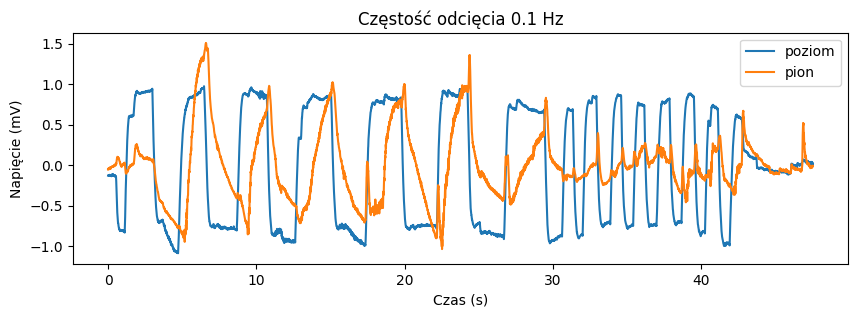

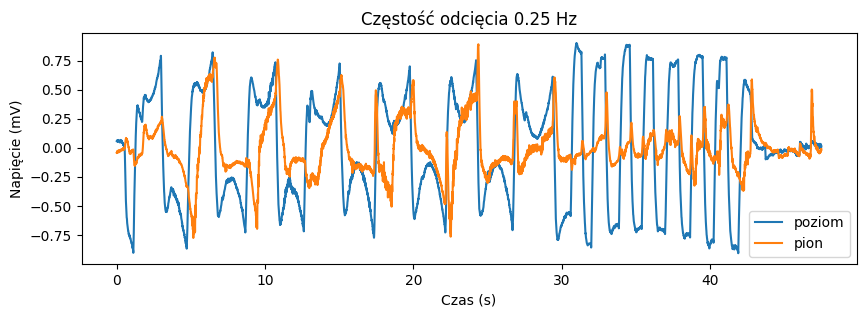

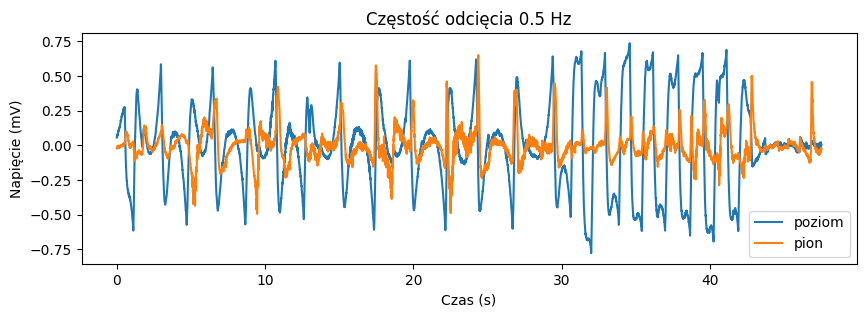

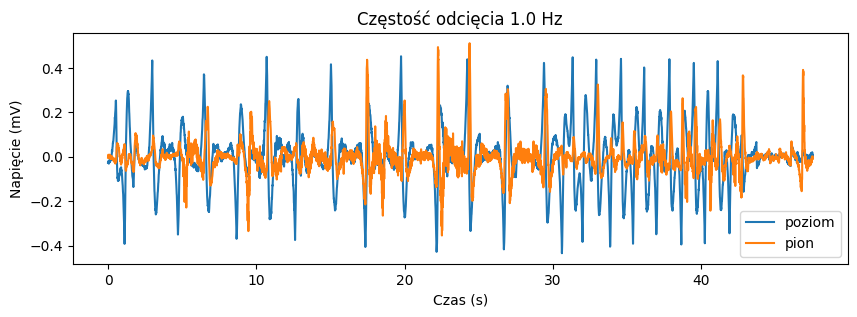

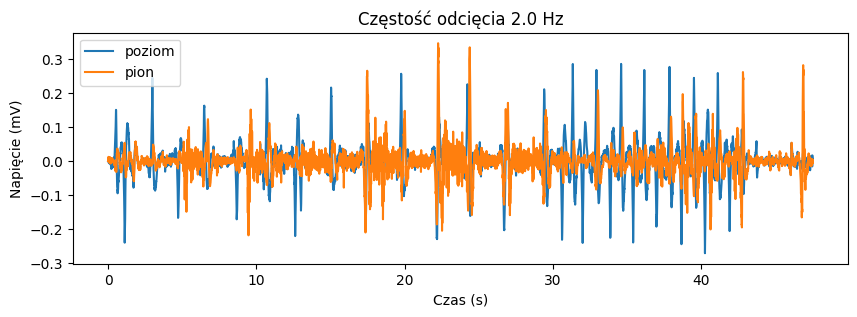

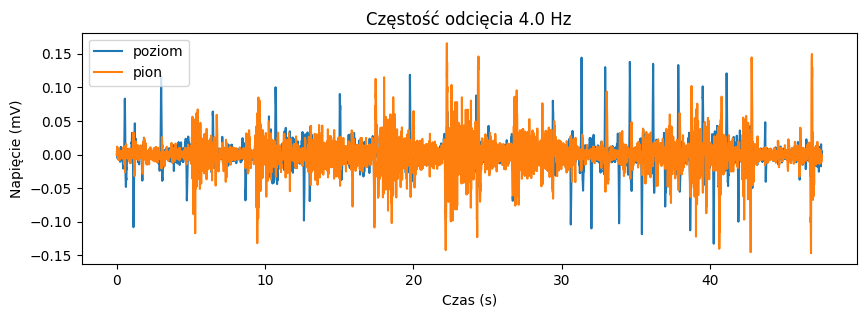

In [ ]:
test_highpass(raw('lewoprawo'))

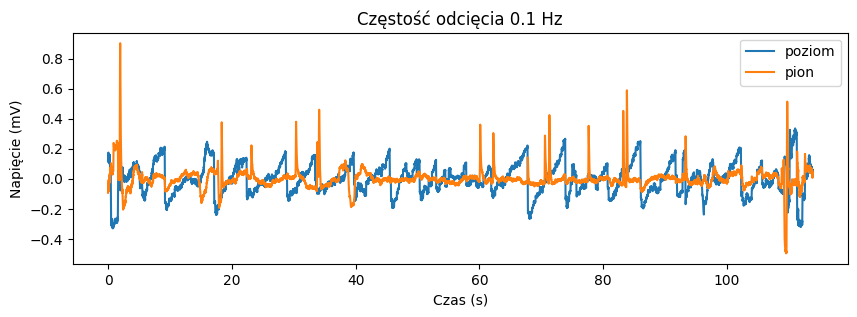

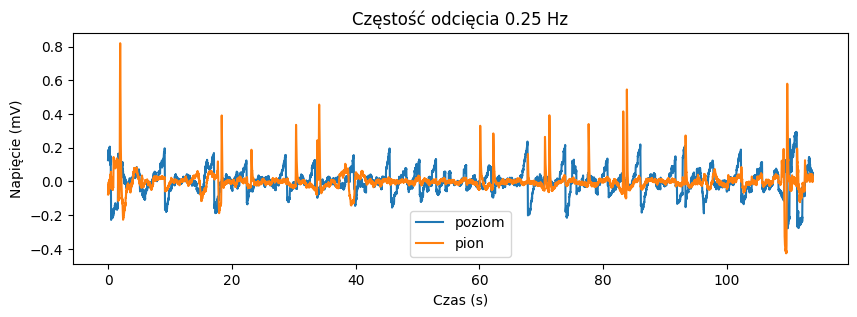

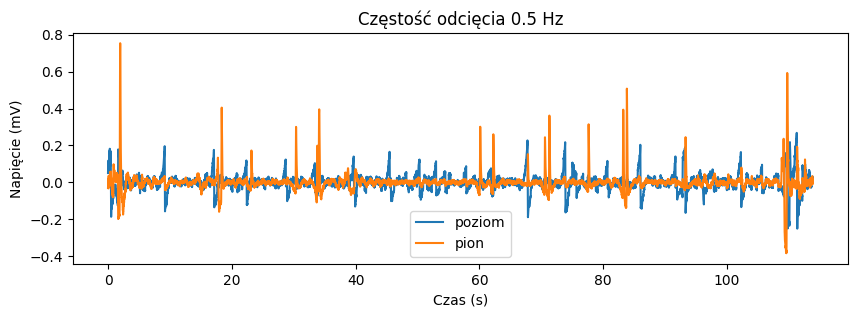

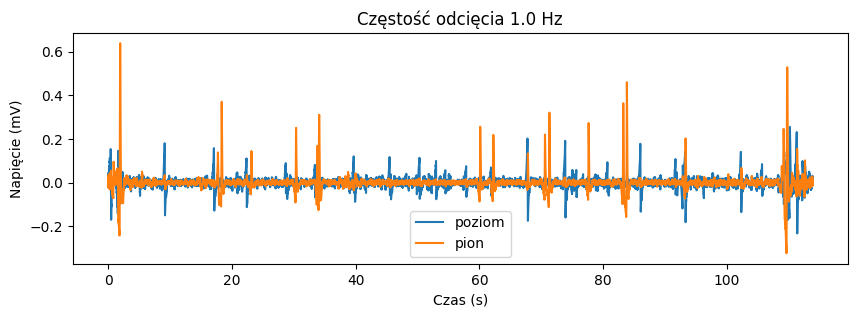

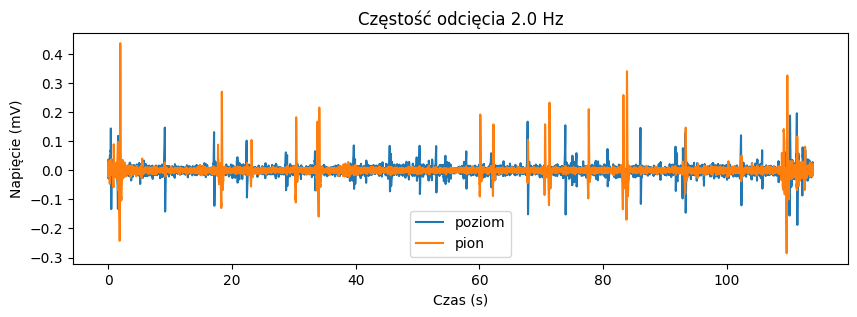

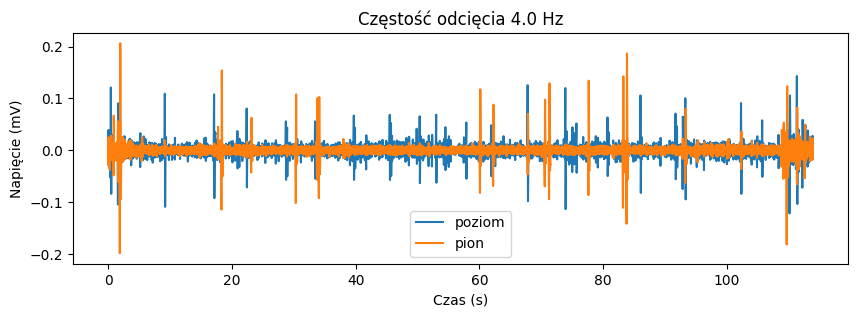

In [ ]:
test_highpass(raw('baja'))

#### Filtry górnoprzepustowe ####
Możemy zauważyć, że już przy filtrze o częstości odcięcia 0.25 Hz mamy doczynienia z efektem usunięcia ciekawych z punktu analizy części sygnału. Wydaje się, że w niższych częstościach (np. poniżej 0.5 Hz) znajdują się takie zjawiska jak ruchy śledzące tekst przez gałkę oczną, czy jakiś ogólny _dryf_ oka. Natomiast w wyższych częstościach możemy zaobserwować np. sakady, szybkie ruchy oka i mrugnięcia, które nie znikają po filtracji nawet przy odcięciu na na poziomie 4 Hz (to są bardziej delty). Ponieważ interesują nas zarówno powolne jak i szybkie zjawiska do dalszej analizy będę używał filtra z częstością odcięcia 0.1 Hz.

In [ ]:
def test_lowpass(sig):
  h, v = sig
  for cf in [15, 30]:
    # f to złożenie filtrów
    f = lambda x: filter(filter(x, cf=0.1, btype='highpass'), cf, btype='lowpass')
    filtered = (f(h), f(v))
    plot(filtered, title=f'Częstość odcięcia {cf} Hz')
    head(filtered, title=f'Fragment początkowy sygnału')

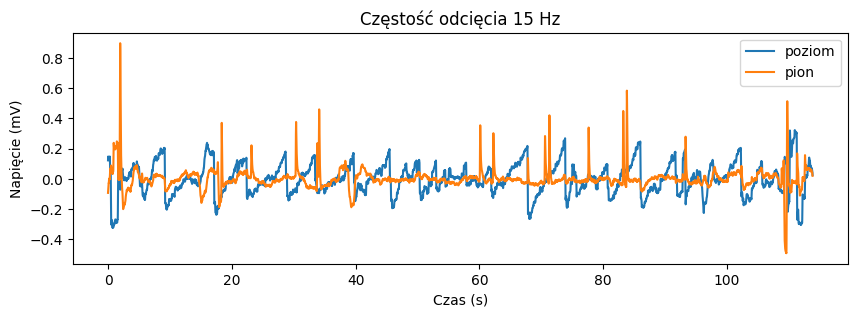

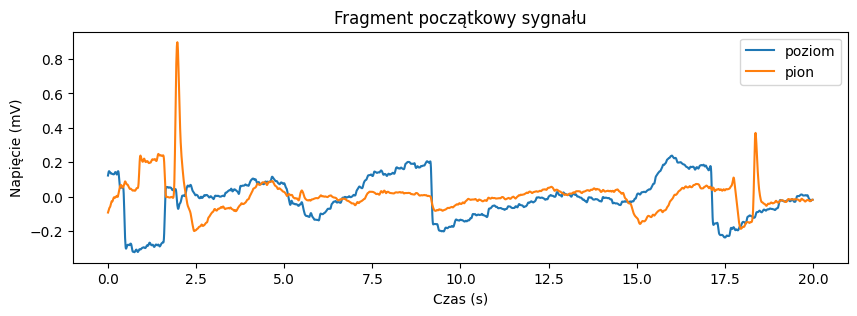

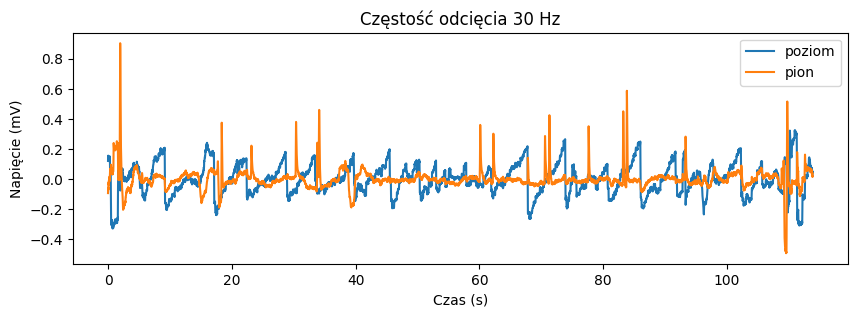

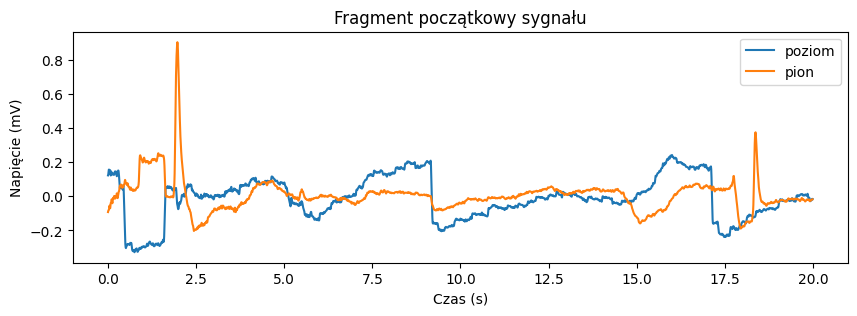

In [ ]:
test_lowpass(raw('baja'))

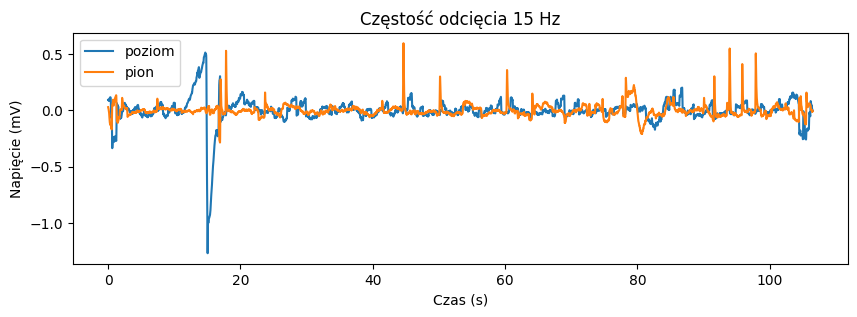

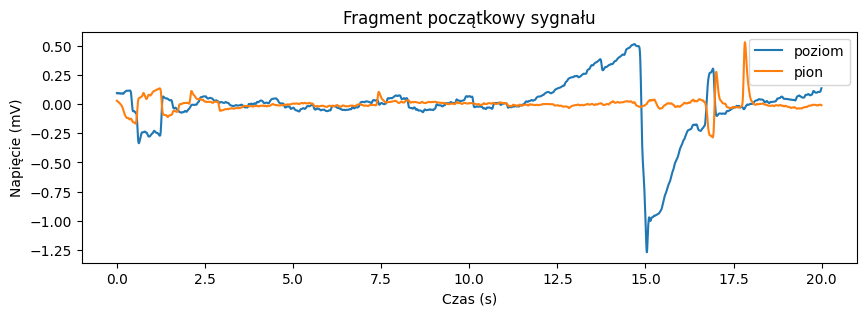

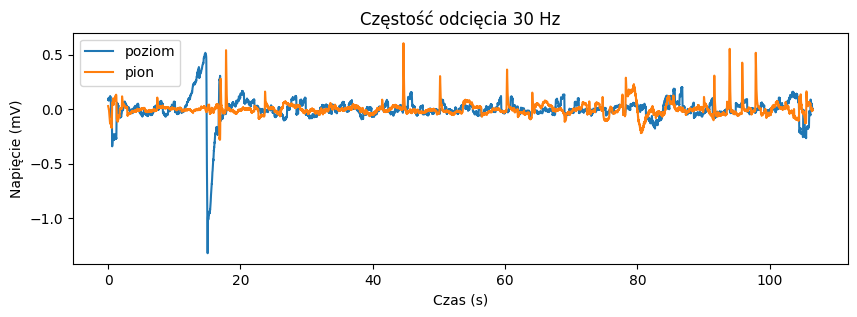

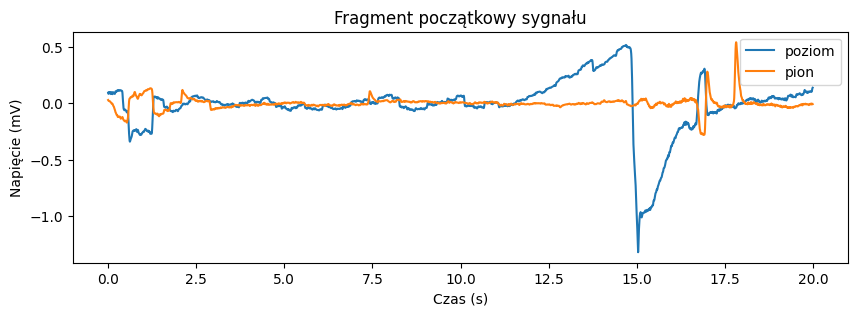

In [ ]:
# ten sygnał wybrałem, bo tutaj występują najszybsze sakady
test_lowpass(raw('jadro'))

#### Filtry dolnoprzepustowe ####
Zadanie filtracji `lowpass` to usunięcie artefaktów z sygnału w szczególności artefaktów mięśniowych oraz szumu sieci. Z powyższych rysunków widać, że artefakty te są lepiej usuwane (sygnał jest mniej zaszumiony), gdy używamy filtra o częstości odcięcie 15 Hz. Musimy jednak się zastanowić, czy nie usuwamy w ten sposób istotnych grafoelementów, np. szybkie sakady, szybkie ruchy oczami. Po analizie obu filtrów widać, że używając filtra 15 Hz nie tracimy istotnych dla analizy informacji z sygnału. Zatem w dalszej analizie będę używał `lowpass` z 15 Hz.

In [ ]:
def signal(name):
  h, v = raw(name)
  f = lambda x: filter(filter(x, cf=0.1, btype='highpass'), cf=15, btype='lowpass')
  return (f(h), f(v))

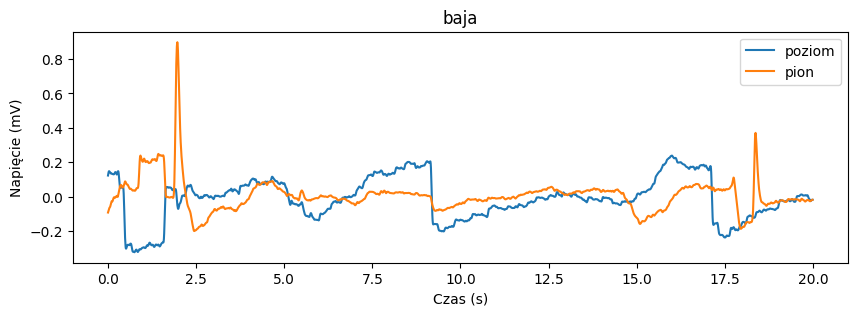

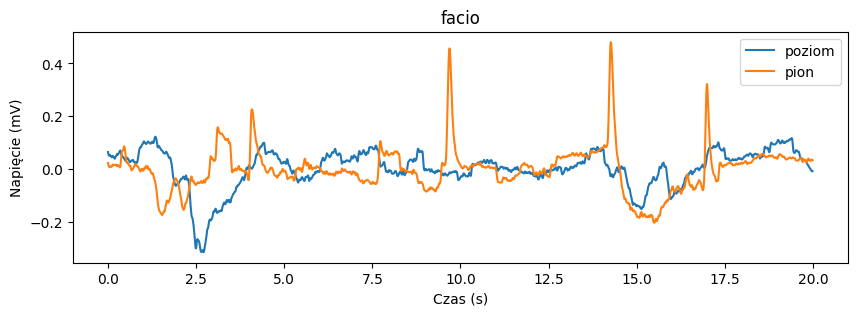

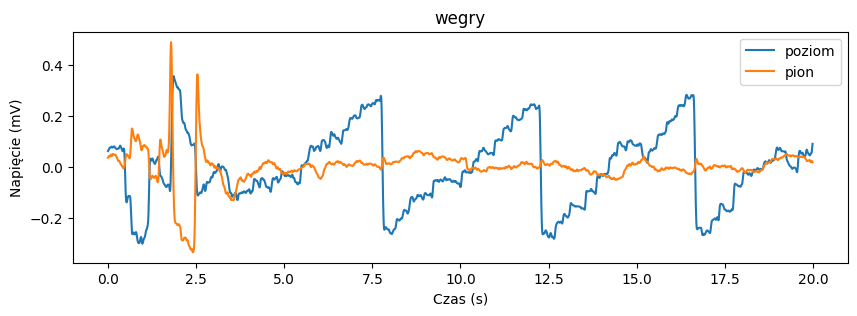

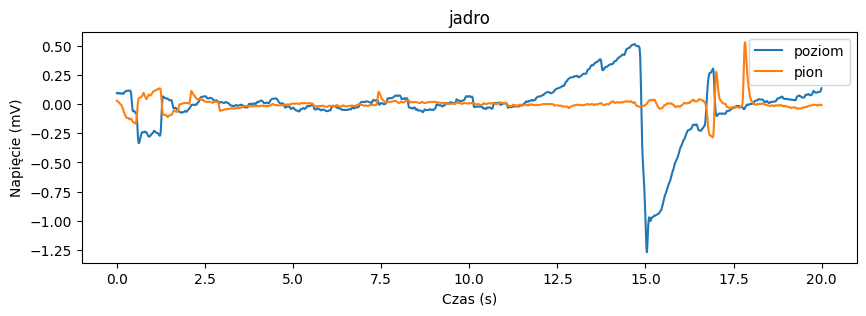

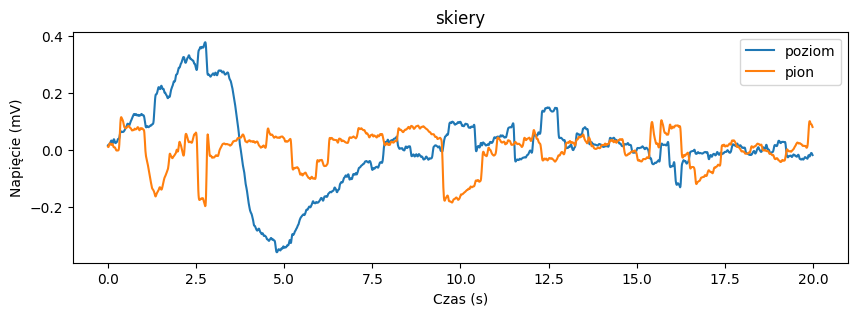

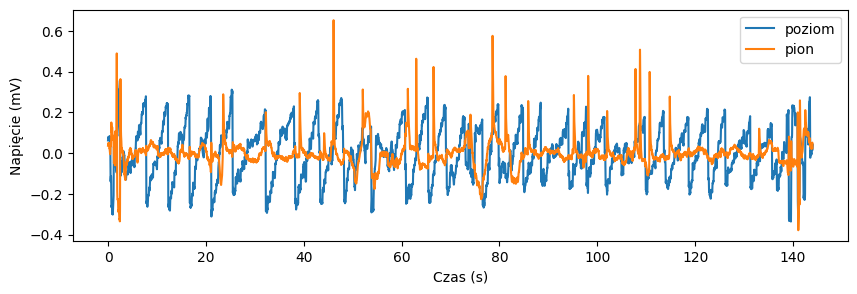

In [ ]:
for name in ['baja','facio','wegry','jadro','skiery']:
  head(signal(name), title=name)

# wegry najładniejsze wyszły
plot(signal('wegry'))

In [ ]:
def eye_map(sig, title=''):
  h, v = sig
  plt.figure(figsize=(5, 5))
  plt.scatter(h, v, c=time(h), alpha=0.7, cmap='viridis')
  bar = plt.colorbar()
  bar.set_label('czas [s]')
  plt.xlabel('poziomy')
  plt.ylabel('pion')
  plt.title(title)
  plt.show()

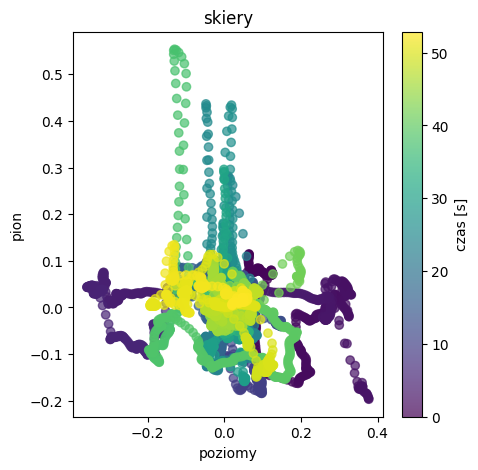

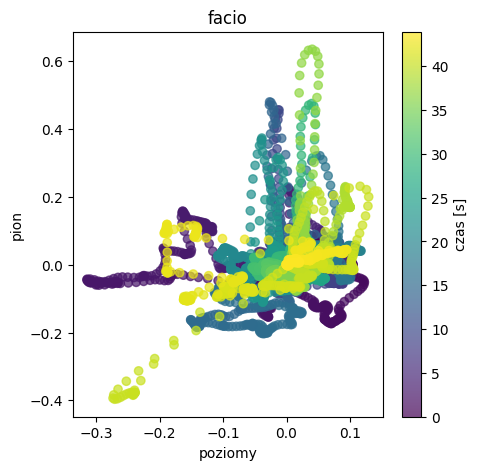

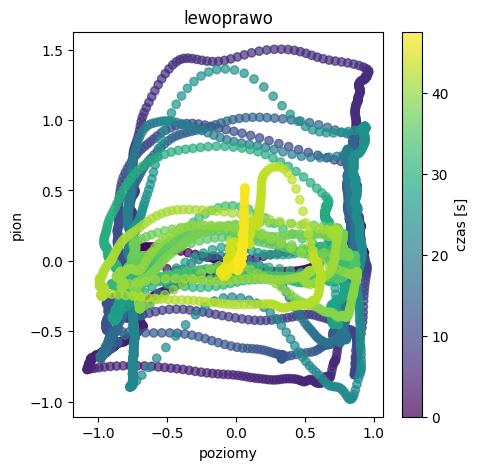

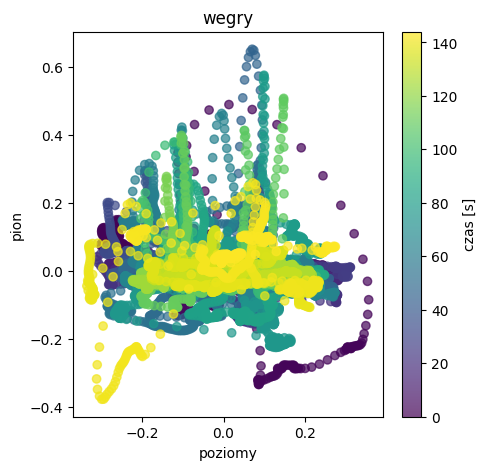

In [ ]:
for name in ['skiery', 'facio', 'lewoprawo', 'wegry']:
  eye_map(signal(name), title=name)

Powyższe rysunki prezentują ewolucje pozycji oka w czasu. Wymiar czasu jest reprezentowany przez kolor.

In [ ]:
def eye_map_3d(sig, title=''):
  x, y = sig
  t = time(x)

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(x, y, t, marker='o', linestyle='-')
  ax.set_xlabel('pion')
  ax.set_ylabel('poziom')
  # ax.set_zlabel('czas')
  ax.set_title(title)
  plt.show()

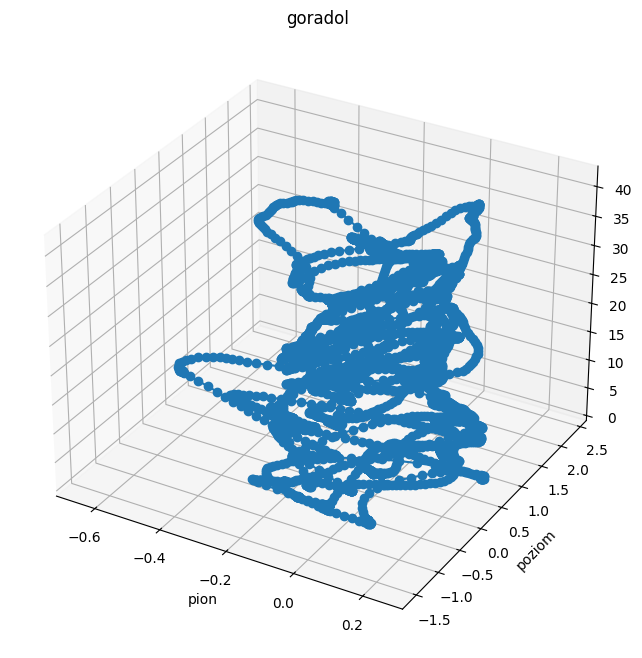

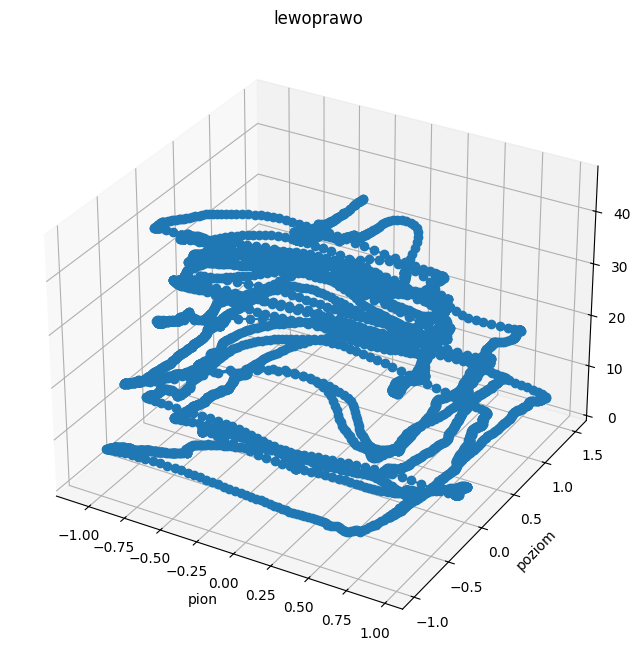

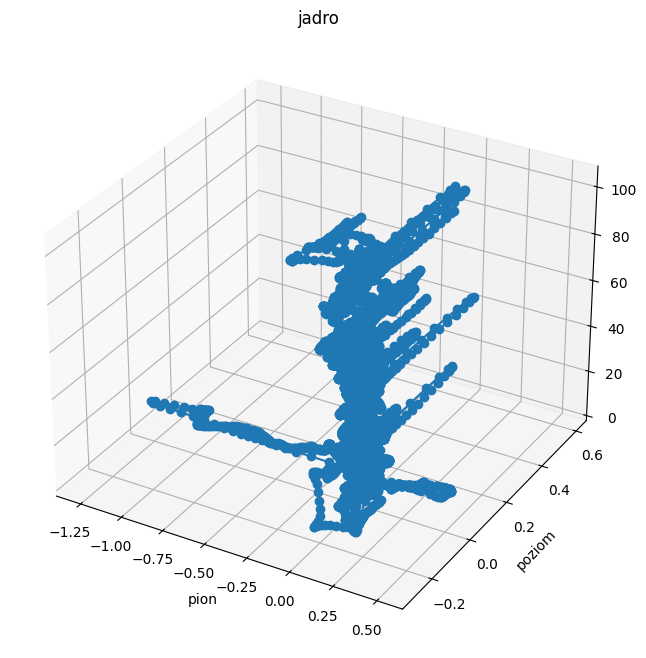

In [ ]:
for name in ['goradol', 'lewoprawo', 'jadro']:
  eye_map_3d(signal(name), title=name)

Tutaj czas ma swoją oś.

#### Mrugnięcia ####

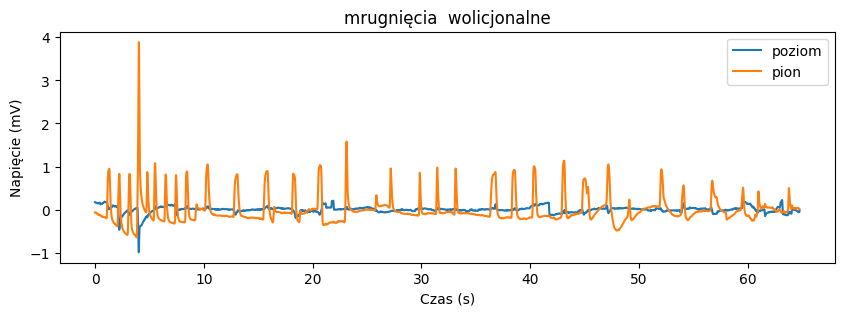

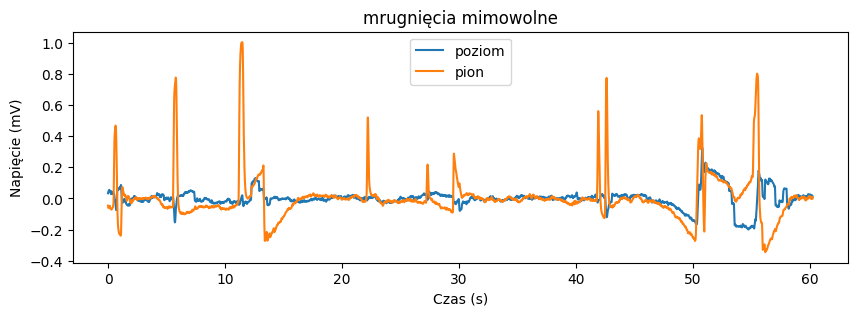

In [ ]:
plot(signal('mrugi'), title='mrugnięcia  wolicjonalne')
plot(signal('spocz'), title='mrugnięcia mimowolne')

In [ ]:
def find_blinks(sig):
  h, v = sig

  # mrugnięcia widać w osi pionowej (ruch oka podczas mrugania)
  wide, _ = ss.find_peaks(v, height=(0.4, 2), width=(30,100), distance=Fs/5)
  narrow, _ = ss.find_peaks(v, height=(0.4, 2), width=(0, 30), distance=Fs/5)
  # blinks = np.concatenate((wide, narrow))

  plt.figure(figsize=(20, 4))
  plt.plot(time(h), h, label='poziomy')
  plt.plot(time(v), v, label='piony')
  plt.axhline(0.4, ls='--', c='gray', alpha=0.5, label='min. wysokość')

  plt.scatter(wide/Fs, v[wide], c='r', label='wolne mrugi')
  plt.scatter(narrow/Fs, v[narrow], c='g', label='szybkie mrugi')
  plt.legend()
  plt.show()

  for blinks, title in zip([wide, narrow], ['Szerokie', 'Wąskie']):
    for i in blinks:
      # patrzymy na 0.3 sekundy w każdą stroną od maks. amplitudy
      eps = int(0.3 * Fs)
      blink = v[i-eps:i+eps]
      plt.plot(time(blink), blink)
    plt.title(title)
    plt.show()

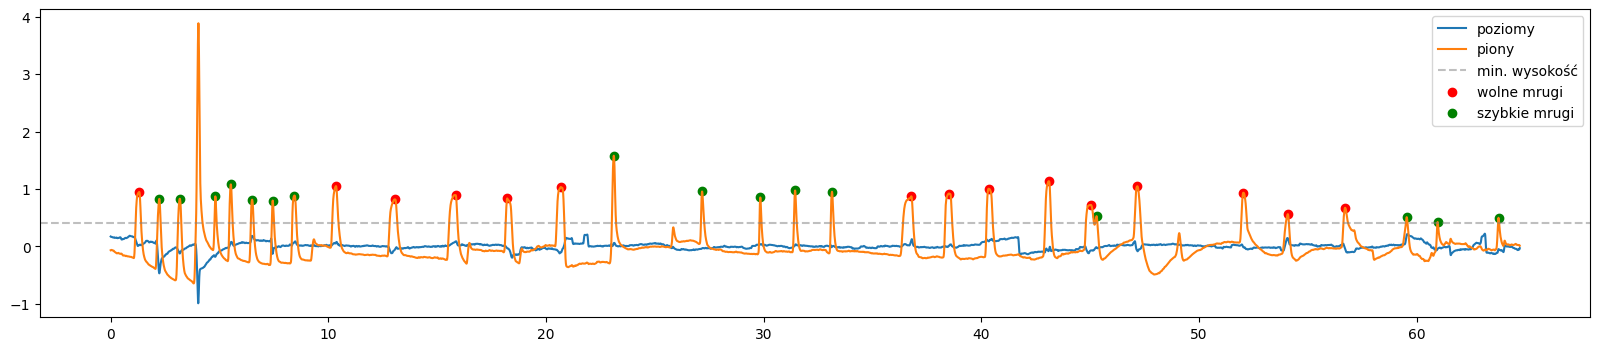

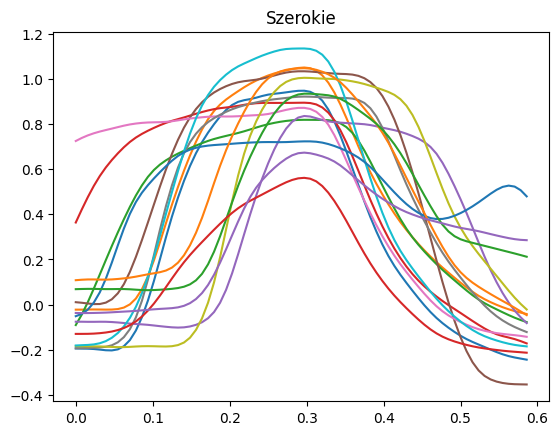

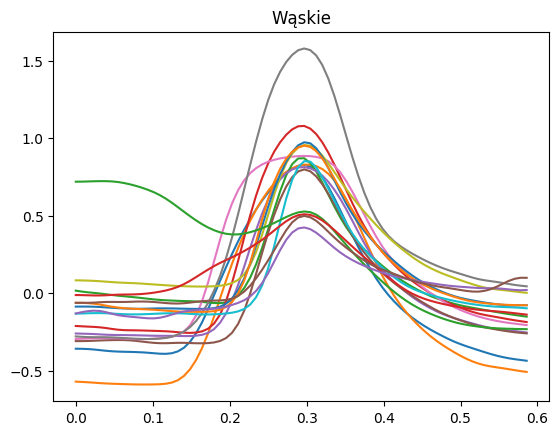

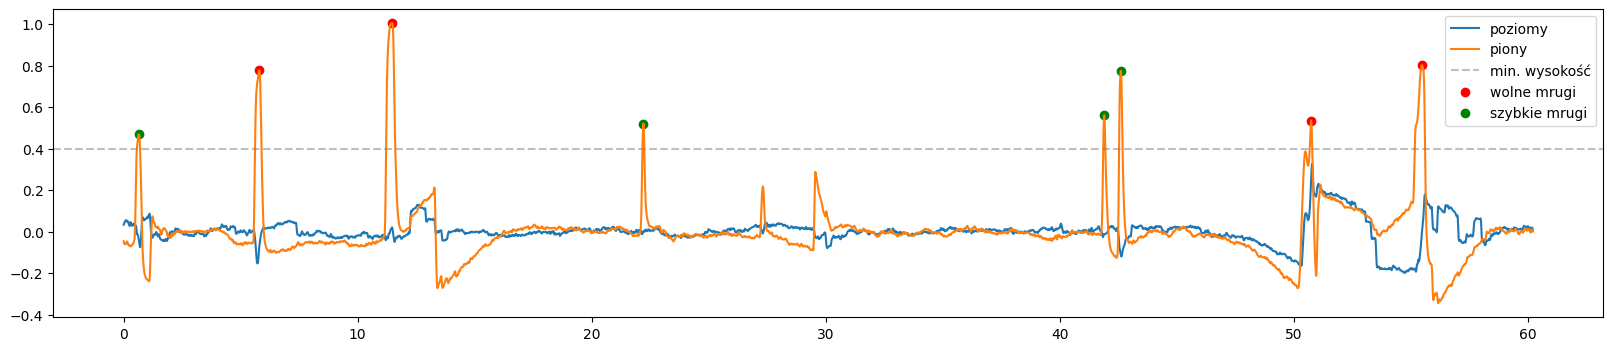

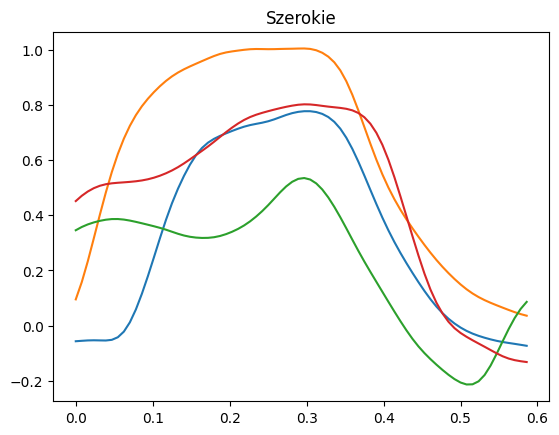

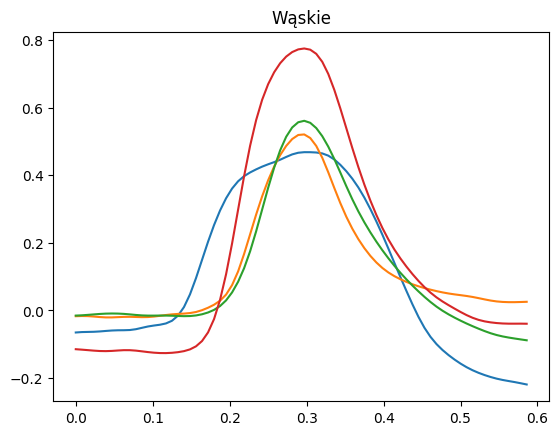

In [ ]:
find_blinks(signal('mrugi'))
find_blinks(signal('spocz'))

Zaobserwowałem dwa rodzaje mrugnięć: szybkie i wolne; tzn. takie bardziej spiczaste i powolne długi. Przebiegi mrugnięć wydają się być całkiem powtarzelne i są podobne do rozkładu t-Studenta albo czegoś takiego. Uważam, że nie da się rozpoznać, czy mrugnięcie jest wolicjonalne czy nie.